<a href="https://colab.research.google.com/github/gayathri12345/Deep-Learning-RNN-Notes/blob/main/Breast_cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data=load_breast_cancer()

In [54]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
columns=data['feature_names']

In [ ]:
X=data['data']

In [ ]:
X.shape

(569, 30)

In [ ]:
Y=data['target']

In [ ]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=45)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
model=tf.keras.models.Sequential([
                      tf.keras.layers.Input(shape=(X_train.shape[1],)),
                      tf.keras.layers.Dense(1,activation='sigmoid')
                                  
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
r=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 0.9399 - accuracy: 0.5713 - val_loss: 0.9476 - val_accuracy: 0.5638
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9261 - accuracy: 0.5916 - val_loss: 0.8842 - val_accuracy: 0.5851
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7970 - accuracy: 0.6451 - val_loss: 0.8262 - val_accuracy: 0.6277
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7853 - accuracy: 0.6375 - val_loss: 0.7740 - val_accuracy: 0.6436
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6787 - accuracy: 0.6820 - val_loss: 0.7255 - val_accuracy: 0.6596
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6966 - accuracy: 0.6716 - val_loss: 0.6809 - val_accuracy: 0.6915
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6114 - accuracy: 0.7182 - val_loss: 0.6413 - val_accuracy: 0.7128
Epoch 8/100


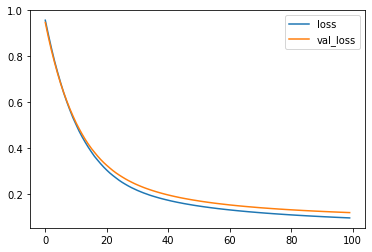

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

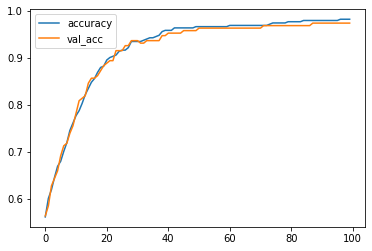

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [60]:
##Predictions
import numpy as np

In [57]:
y_pred=model.predict(X_test)

In [62]:
y_pred=np.round(y_pred).flatten()

In [63]:
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
confusion_matrix(Y_test,y_pred)

array([[ 65,   3],
       [  2, 118]])

In [67]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        68
           1       0.98      0.98      0.98       120

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [69]:
model.evaluate(X_test,Y_test)  #calculating accuracy

6/6 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9734


[0.11841151863336563, 0.9734042286872864]